In [13]:
import pandas as pd
import numpy as np
import pickle
    
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, auc

In [2]:
df_1 = pd.read_csv("dataset_1.csv")
df_2 = pd.read_csv("dataset_2.csv")
df = pd.concat([df_1, df_2])
df["character"] = df["character"].apply(lambda x: ord(x))
df['y'] = df.pop('result')

In [3]:
df.head()

,character,X,Y,Z,H,DD,UD,S,y
0,77,0.32129,-0.11835,-2.64924,0.1491,0.3979,0.2488,1,Thanush S
1,82,0.32129,-0.11835,-2.64924,0.1111,0.3451,0.2340,1,Thanush S
2,85,0.78839,-0.08535,-1.31034,0.1328,0.2072,0.0744,1,Thanush S
3,68,0.78839,-0.08535,-1.31034,0.1291,0.2515,0.1224,1,Thanush S
4,83,0.72629,0.15660,-0.00234,0.1249,0.2317,0.1068,1,Thanush S


In [4]:
df["y"] = df['y'].apply(lambda x: 1 if x == "Thanush S" else 0)

In [5]:
y = df.pop("y")
x = df.copy()

In [6]:
y.value_counts()

y
0    671
1    594
Name: count, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [8]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
model.fit(x_train, y_train)
THRESHOLD = 0.7

In [9]:
probs = model.predict_proba(x_test)
print(probs)

[[9.78761472e-01 2.12385281e-02]
 [4.81206462e-01 5.18793538e-01]
 [7.53382482e-01 2.46617518e-01]
 [9.40511869e-01 5.94881308e-02]
 [5.49061929e-01 4.50938071e-01]
 [5.41639570e-01 4.58360430e-01]
 [3.28049816e-01 6.71950184e-01]
 [8.08105632e-01 1.91894368e-01]
 [7.97480716e-01 2.02519284e-01]
 [2.68340383e-01 7.31659617e-01]
 [7.21330280e-01 2.78669720e-01]
 [7.91802748e-01 2.08197252e-01]
 [6.41811173e-01 3.58188827e-01]
 [8.34184500e-02 9.16581550e-01]
 [3.46546147e-01 6.53453853e-01]
 [8.05509121e-01 1.94490879e-01]
 [8.21105370e-01 1.78894630e-01]
 [4.02913810e-01 5.97086190e-01]
 [8.07190088e-01 1.92809912e-01]
 [7.61664494e-01 2.38335506e-01]
 [6.72119381e-01 3.27880619e-01]
 [6.16755159e-01 3.83244841e-01]
 [7.72674613e-02 9.22732539e-01]
 [5.93450387e-01 4.06549613e-01]
 [4.59261851e-01 5.40738149e-01]
 [7.70786176e-01 2.29213824e-01]
 [1.63441708e-01 8.36558292e-01]
 [8.60390695e-01 1.39609305e-01]
 [7.48518651e-01 2.51481349e-01]
 [3.89708856e-02 9.61029114e-01]
 [3.134424

In [10]:
# preds = model.predict(x_test)
preds = [0 if prob[1] < 0.5 else 1 for prob in probs]
print(preds)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]


In [11]:
accuracy = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

In [12]:
print(accuracy)
print(conf_mat)

0.8221343873517787
[[113  20]
 [ 25  95]]


In [15]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

(0.0, 1.0)

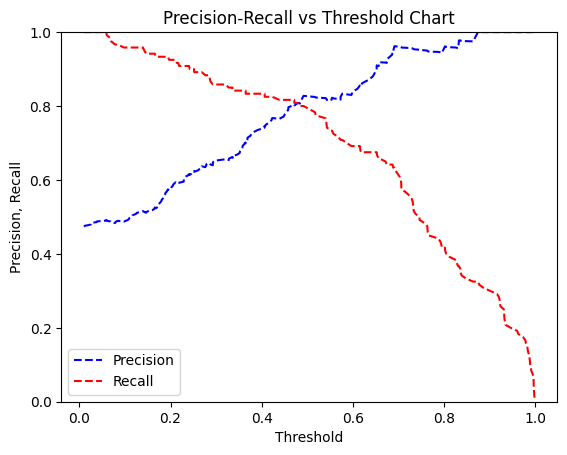

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [34]:
train_chars = set(x_train['character'].unique())

In [35]:
test_chars = set(x_test['character'].unique())

In [36]:
train_chars - test_chars

set()

In [39]:
test_chars.difference(train_chars)

set()

In [23]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [68]:
model.weights

AttributeError: 'LogisticRegression' object has no attribute 'weights'

In [77]:
model.coef_[0]

array([-0.03428312,  1.00643725, -2.95581937, -1.27659514,  2.17013224,
       -1.85377945, -4.02391169,  0.35930657])

In [72]:
model.intercept_

array([1.388039])

In [86]:
t = np.sum(x_train.iloc[0] * model.coef_[0]) + model.intercept_

In [87]:
1 / 1 + np.exp(t[0])

16.41860868665377

In [28]:
x_test.to_dict('records')[:10]

[{'character': 84,
  'X': -0.05274,
  'Y': -0.02826,
  'Z': -0.03524,
  'H': 0.0837,
  'DD': 0.6212,
  'UD': 0.5375,
  'S': 2},
 {'character': 88,
  'X': -0.75321,
  'Y': -0.00079,
  'Z': -0.88697,
  'H': 0.0948,
  'DD': 0.1797,
  'UD': 0.0849,
  'S': 5},
 {'character': 81,
  'X': -0.03478,
  'Y': 0.08947,
  'Z': -0.11771,
  'H': 0.0718,
  'DD': 0.2485,
  'UD': 0.1767,
  'S': 4},
 {'character': 76,
  'X': -1.00052,
  'Y': 0.35446,
  'Z': -0.24913,
  'H': 0.0995,
  'DD': 0.1942,
  'UD': 0.0947,
  'S': 2},
 {'character': 78,
  'X': -0.0085,
  'Y': 0.0942,
  'Z': 0.00596,
  'H': 0.0937,
  'DD': 0.2301,
  'UD': 0.1364,
  'S': 6},
 {'character': 76,
  'X': 0.01904,
  'Y': 0.09268,
  'Z': -0.05799,
  'H': 0.0842,
  'DD': 0.1849,
  'UD': 0.1007,
  'S': 5},
 {'character': 85,
  'X': -0.44575,
  'Y': -0.51277,
  'Z': 0.23393,
  'H': 0.0694,
  'DD': 0.1279,
  'UD': 0.0585,
  'S': 5},
 {'character': 80,
  'X': -0.03094,
  'Y': 0.09782,
  'Z': -0.33312,
  'H': 0.0898,
  'DD': 0.2489,
  'UD': 0.159

In [29]:
y_test[]

106    0
209    1
316    0
59     1
550    0
433    0
222    1
155    0
239    0
295    1
Name: y, dtype: int64